
<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Exploración de datos</h1>
  <p></p>
</div>

### Objetivo

Comprender a un nivel granular el contenido de los datos y responder las preguntas de negocio planteadas

In [1]:
import pandas as pd
import numpy as np
import pickle
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

import seaborn as sns

sns.set(style="whitegrid")

<div class="alert alert-warning" role="alert">
    <lu>
    <li> Prguntas a resolver 

        
        
- ¿En qué horarios hay mayor afluencia y en qué estaciones?
- Da una breve
descripción de por qué crees que es así. 
- Si consideras remover outliers, justifica el método que empleaste y, en caso de que no remuevas outliers, argumenta
estadísticamente tu decisión.
  
</div>

###  Cargar datos 

In [2]:

# Load data (deserialize)
with open('../data/interim/dataset_cleaning_level_1.pickle','rb') as handle:
    df = pickle.load(handle)


### Show data

In [3]:
df.head(5)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo,Hora_Retiro_,Minuto_Retiro,Segundo_Retiro,Hora_Arribo_,Minuto_Arribo,Segundo_Arribo
0,M,28,11302,73,2021-07-31,23:57:44,62.0,2021-08-01,00:00:08,23,57,44,0,0,8
1,M,33,10571,121,2021-07-31,23:54:00,143.0,2021-08-01,00:00:59,23,54,0,0,0,59
2,M,19,12451,132,2021-07-31,23:52:58,122.0,2021-08-01,00:01:24,23,52,58,0,1,24
3,M,32,8314,7,2021-07-31,23:23:41,7.0,2021-08-01,00:01:25,23,23,41,0,1,25
4,F,36,7993,7,2021-07-31,23:23:17,7.0,2021-08-01,00:01:32,23,23,17,0,1,32


In [4]:
df.dtypes

Genero_Usuario                   object
Edad_Usuario                      int64
Bici                              int64
Ciclo_Estacion_Retiro             int64
Fecha_Retiro             datetime64[ns]
Hora_Retiro                      object
Ciclo_EstacionArribo            float64
Fecha Arribo             datetime64[ns]
Hora_Arribo                      object
Hora_Retiro_                      int64
Minuto_Retiro                     int64
Segundo_Retiro                    int64
Hora_Arribo_                      int64
Minuto_Arribo                     int64
Segundo_Arribo                    int64
dtype: object

In [5]:
# df.describe()

### Número de muestras

In [6]:
df.shape

(481341, 15)


# Fechas

Verificar que todos los datos pertencescan al rango de fecha establecido

### Fecha máxima

In [7]:
max(df['Fecha_Retiro'])

Timestamp('2021-10-06 00:00:00')

### Fecha mínima

In [8]:
min(df['Fecha_Retiro'])

Timestamp('2021-05-04 00:00:00')

<div class="alert alert-info" role="alert">
- Se puede notar que existen datos fuera del rango de fecha establecido, por lo que es necesario filtrar los datos.
</div>


### Filtro de rango de fechas

In [9]:
df[(df['Fecha_Retiro'] >= "2021-08-01") & (df['Fecha_Retiro'] <= "2021-10-30")].shape

(481082, 15)

In [10]:
df = df[(df['Fecha_Retiro'] >= "2021-08-01") & (df['Fecha_Retiro'] <= "2021-10-30")]

In [11]:
# obtener los datos eliminados
1077330 - 1068023

9307

<div class="alert alert-info" role="alert">
- Se eliminaron 9,307 muestras fuera del rango de fecha establecido
</div>


## Edad

Explorar los rango de edades de los usaurios de ECOBICI

In [12]:
# Edad máxima de los usuarios
max(df['Edad_Usuario'].unique())

86

In [13]:
# Edad mínima de los usuarios
min(df['Edad_Usuario'].unique())

17

In [14]:
# Número de edades diferentes en las muestras
df['Edad_Usuario'].nunique()

67

## Grafia de barras de la edad de los usuarios

In [15]:
df_tmp = pd.DataFrame(df.groupby('Edad_Usuario')['Bici'].count())


<AxesSubplot: xlabel='Edad_Usuario'>

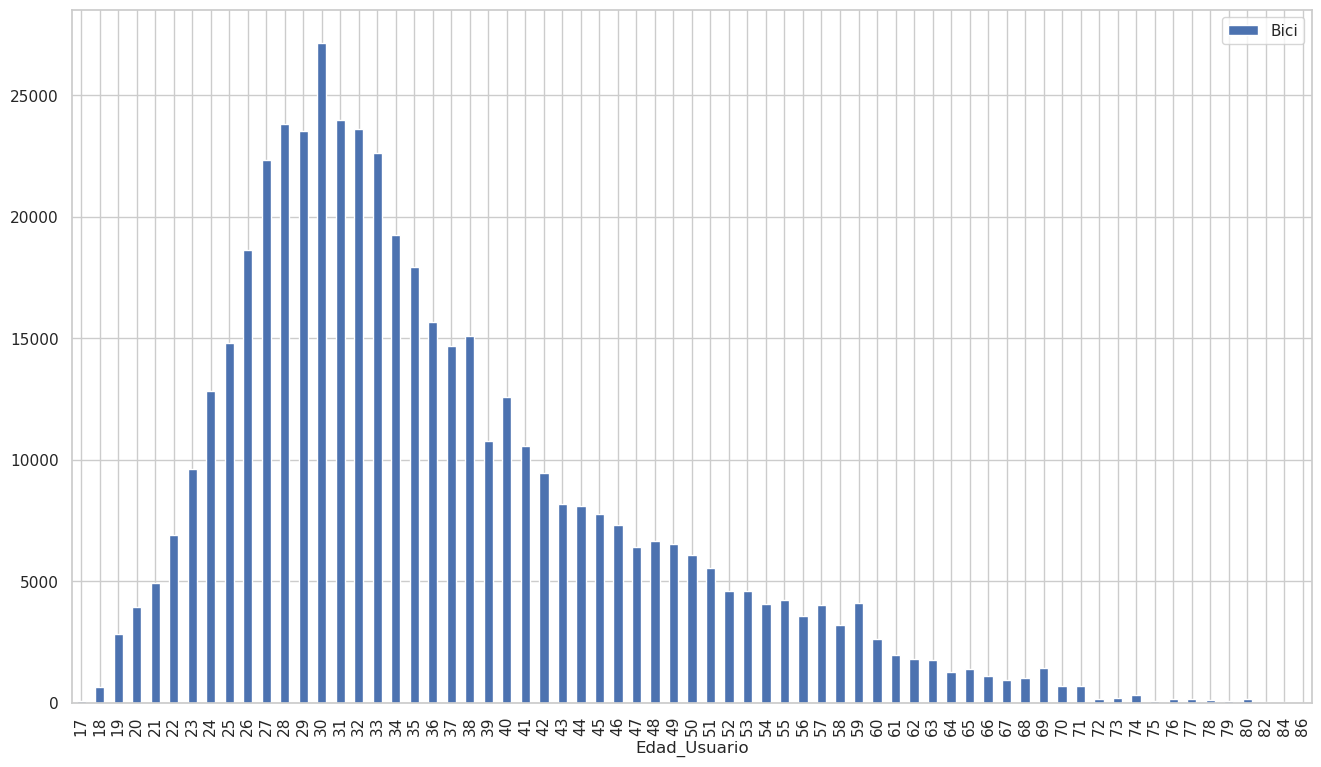

In [16]:
df.groupby('Edad_Usuario')['Bici'].count().plot(kind = 'bar', legend = 'Reverse',figsize=(16,9))


## Valores atípicos

* Al analizar la gráfica de frecuencia de edades se puede observar que una de sus colas (derecha) es más larga que la opuesta.

* Se analizaran las edades utilizando una herramineta visual como lo es una gráfica de bigotes.



### Gráfica de bigotes utilizando una tranformación min-max

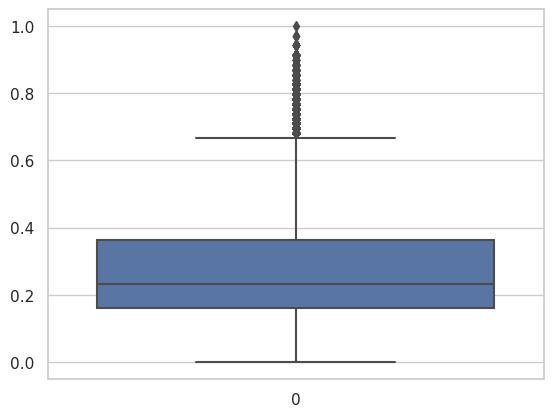

In [17]:

x = df['Edad_Usuario'].values #returns a numpy array
x = x.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_min_max = pd.DataFrame(x_scaled)
ax = sns.boxplot(data=df_min_max)

### Gráfica de bigotes sin normalización de datos

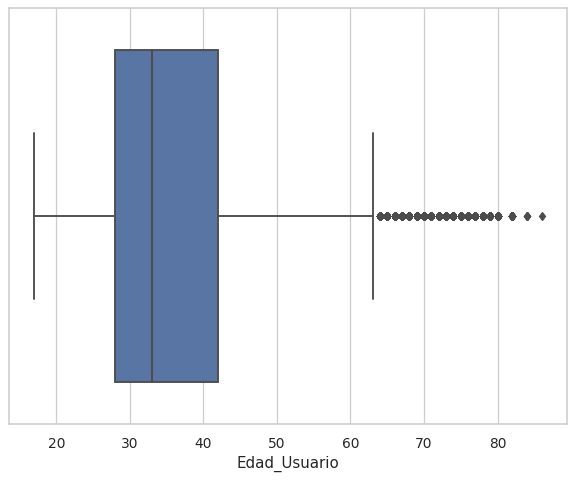

In [18]:
fig = plt.figure(num = None, figsize = (8, 6), dpi = 90, facecolor = 'w', edgecolor = 'k')
plt.grid(True)
sns.set(style='darkgrid')
ax = sns.boxplot(x="Edad_Usuario", data=df)

<div class="alert alert-info" role="alert">
- Ambas gráficas muestra que las edades porteriores a los 62 años se pueden tomar como  punto de datos NO legítimo, ya que están lejos de la media o mediana en la distribución,lo cual concuerda con la definición de Outlier.
</div>


<div class="alert alert-info" role="alert">

En la convención basada en gráfica de cajas, los valores atípicos utilizando diagramas de caja y la regla de proximidad del rango intercuartil ( IQR ) se re obtiene de acuerdo con la regla de proximidad IQR, un valor es un valor atípico si cae fuera de estos límites:

Límite superior = 75º cuantil + (IQR * 1.5) Límite inferior = 25º cuantil - (IQR * 1.5)

Aquí, IQR viene dado por la siguiente ecuación: IQR = 75º cuantil - 25º cuantil

Por lo general, calculamos los límites de la regla de proximidad IQR multiplicando el IQR por 1.5
</div>





<div class="alert alert-danger" role="alert">
<ul>
    <li>
Nota : por falta de tiempo no fue posible explorar a detalles los datos que caen en la categoría de outliers , por tal motivo se omite su eliminación de los análisis posteriores
 
</div>

## Genero del usuario

In [20]:


df['Genero_Usuario'].nunique()


2

<AxesSubplot: xlabel='Genero_Usuario'>

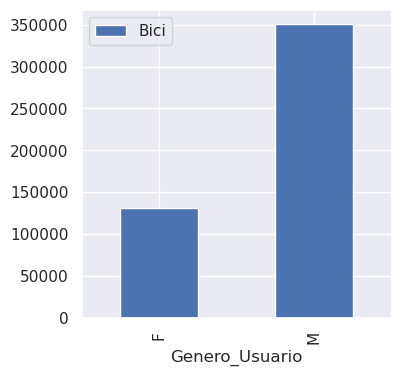

In [21]:
# Gráfica de barras para la variables 'Genero_Usuario'
df.groupby('Genero_Usuario')['Bici'].count().plot(kind = 'bar', legend = 'Reverse',figsize=(4,4))


<div class="alert alert-info" role="alert">
- Existe una desbalance de genero de los usuario de ecobicis

### Agrupación de datos por mes

In [22]:
# Crear dataframe agrupado por mesç

df_tmp  = df.groupby(df.Fecha_Retiro.dt.month).agg(muestras_x_mes=('Bici','count'))


### Número de muestras por mes 

In [23]:
df_tmp.index.rename('num_mes', inplace=True)
df_tmp

,muestras_x_mes
num_mes,
8,78628
9,338152
10,64302


### Promedio aproximado de numero de viajes por mes

In [24]:
df_tmp['muestras_x_mes']/30

num_mes
8      2620.933333
9     11271.733333
10     2143.400000
Name: muestras_x_mes, dtype: float64

### Promedio aproximado de numero de viajes para los meses Agosto, Septiembre y Octubre

In [25]:
df_tmp['muestras_x_mes'].sum()/90

5345.355555555556

<div class="alert alert-info" role="alert">
- Se puede notar que el mes en el que más se utilizan las ecobicis es Octubre, esto puede ser por diversos factores, uno de ellos puede ser el clima de la ciudad.
</div>

### Agrupación de datos por mes y hora de retiro


In [26]:
df_gp_mont_hour = df.groupby([df.Fecha_Retiro.dt.month,'Hora_Retiro_'])['Bici'].count().reset_index(level='Hora_Retiro_')

In [27]:
df_gp_mont_hour.sort_values(['Bici'],ascending=False,)

,Hora_Retiro_,Bici
Fecha_Retiro,,
9,14,28262
9,18,26299
9,15,25849
9,13,24631
9,17,23100
...,...,...
8,4,37
10,4,26
9,1,12


<div class="alert alert-info" role="alert">
- Las horas con mayor afluencia (top 5) de bicicletas es a la hora de comida 15 y 14 horas y al final de la jornada laboral entre las 18 y 19 horas
</div>

### Agrupación de datos por hora de retiro de ECOBICI


In [28]:
df.groupby(['Hora_Retiro_'])['Bici'].count().reset_index(level='Hora_Retiro_').sort_values(by=['Bici'],ascending=False).head(5)

,Hora_Retiro_,Bici
12,14,40784
13,15,37129
16,18,36252
11,13,36217
7,9,33362


<div class="alert alert-info" role="alert">
- La tabla muestra que si no se toma encuenta la variable 'mes', las horas con mayor afluencia son la hora de salidad laboral (18 hrs) , la hora de la comida (13,14 y 15 hrs) y la hora de entrada laboral (8 hrs).
</div>

### Gráfica de uso de ecobicis por hora en los meses Agosto , Septiembre y Octubre

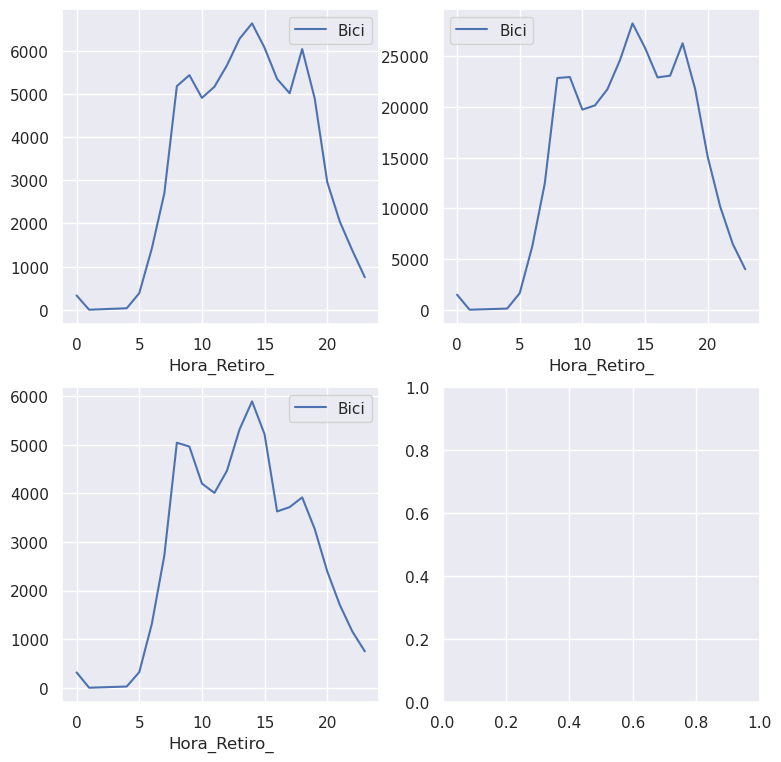

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(9, 9))
axe = axes.ravel()


for index, item in enumerate(df_gp_mont_hour.index.unique()):
    df_tem = df_gp_mont_hour[df_gp_mont_hour.index == item]
    df_tem.plot(x ='Hora_Retiro_', y='Bici', kind = 'line',ax=axe.flat[index])
    # plt.xlabel("")
    # plt.ylabel("")

<div class="alert alert-info" role="alert">
- Las gráficas refuerzan la idea expuesta anteriormente sobre las horas con mayor afluencia 
</div>

### Agrupación por estación de retiro y hora de retiro

In [30]:
display(df.groupby(['Ciclo_Estacion_Retiro','Hora_Retiro_'])['Hora_Retiro'].count().sort_values(ascending=False).reset_index(name='count').head(5))


,Ciclo_Estacion_Retiro,Hora_Retiro_,count
0,266,8,709
1,272,8,513
2,271,8,502
3,271,7,500
4,1,14,399


<div class="alert alert-info" role="alert">
- Durante el pico matutino que corresponde a los horarios entre las 7 y las 9 de la mañana se puede notar que existe una mayor afluencia de uso del transporte en la cicloestaciones circundantes a a la estación del tren ligero de Buenavista. Esto puede deberse a que la estación Buenavista es un punto estrategico de conexiones con las estaciones y paradas de diversos sistemas de transportese ( CETRAM, Metro y Metrobús) y una conexión entre CDMX y es estado de México además de que en dicho lugar se encuentra uno de los centros comerciales más grandes de la ciudad, Forum Buenavista. 
    
- El top de la lista se encuentra en la estación 266 (CE-266-267 Jesús García - Carlos J. Meneses) con 1,604 viajes para los meses en cuestión y el segundo lugar lo toma la estación 272 (CE-271-272 Jesús García - Carlos J. Meneses) con 1,071 viajes trimestrales iniciados.
</div>

### Agrupación por estación de retiro

In [31]:
display(df.groupby(['Ciclo_Estacion_Retiro'])['Bici'].count().sort_values(ascending=False).reset_index(name='count').head(5))


,Ciclo_Estacion_Retiro,count
0,271,3800
1,1,3754
2,41,3617
3,27,3308
4,64,3282


<div class="alert alert-info" role="alert">
- Se segmentamos los datos sólo utilizando la variables de estación de retiro (omitiendo la hora de retiro) se puede obervar que la estación 271 coninua en el top 5 , para este caso, tomando el titulo de la estaciñon con más viajes de inicio de las rutas de ECOBICI
</div>

# Cluestering

Usa un método de aprendizaje no supervisado para encontrar perfiles de uso de las estaciones. El objetivo es categorizar a las estaciones en diferentes grupos a partir de su comportamiento de entradas, salidas y tipo de usuarios.

- Explica qué método usaste y por qué.
- Describe detalladamente cómo decidiste el número de grupos. Es decir:
¿qué criterio elegiste?, ¿por qué? y ¿de qué tipo? Por ejemplo, di si utilizaste
un criterio de información o un criterio no cuantitativo.
- De los grupos que encontraste, describe las características que puedes
inferir de estos.

## Descripción de la solución:  

- Se utilizara k-means para explorar grupos comunes de usuarios que utilizan las diversas estaciones de ECOBICI.
- Debido a la falta de tiempo no es posible agregar contexto geoespacial a los datos, por lo tanto los grupos se basaran en la similaridad de los usuarios de acuerdo a un contexto temporal, de genero y de edad.
- Posteriormente se experimentará para tratar de encontrar el número óptimo de cluster para los datos 
- Por se experimentará con otras técnicas de clustering

Como primer paso, transformaremos las variables de tiempo y fecha a un formato que puedan utilizanr los algorimos de machine learning para detectar patrones

### Encoding Cyclical Features

Un método común para codificar datos cíclicos es transformar los datos en dos dimensiones utilizando una transformación de seno y conseno

In [32]:
df['Hora_Retiro_sin'] = np.sin(2 * np.pi * df['Hora_Retiro_']/24.0)
df['Hora_Retiro_cos'] = np.cos(2 * np.pi * df['Hora_Retiro_']/24.0)

In [33]:
df['Minuto_Retiro_sin'] = np.sin(2 * np.pi * df['Minuto_Retiro']/60.0)
df['Minuto_Retiro_cos'] = np.cos(2 * np.pi * df['Minuto_Retiro']/60.0)

In [34]:
df['Dia_Retiro_sin'] = np.sin(2 * np.pi * df.Fecha_Retiro.dt.day/31.0)
df['Dia_Retiro_cos'] = np.cos(2 * np.pi * df.Fecha_Retiro.dt.day/31.0)

Variables 

- Edad de Usuario
- Genero de Usuario
- Fecha de Retiro (día)
- Hora de retiro


- Número retiros por hora


### 


<div class="alert alert-danger" role="alert">
<ul>
    <li>
    Por falta de tiempo no es posible concluir esta sección

 
</div>